In [ ]:
# SIMPLE LINEAR REGRESSIONS

In [ ]:
# Import all necessaries library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Stage 1 : Data Gathering -- collect the data
# import dataset
data = pd.read_csv('https://raw.githubusercontent.com/masturina9/My_Datasets/refs/heads/main/Student_Grades.csv')
data

# predicts marks based on hours studied

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
0,2.5,0.5,0.0,2,2.3,21,C
1,5.1,1.5,0.5,4,4.9,47,B
2,3.2,1.0,0.5,3,2.9,27,C
3,8.5,3.7,1.2,7,7.7,75,A
4,3.5,1.2,0.3,3,3.2,30,C
5,1.5,0.2,0.0,2,2.2,20,C
6,9.2,4.8,3.0,8,9.0,88,A
7,5.5,3.2,2.0,6,6.2,60,B
8,8.3,5.1,3.5,8,8.3,81,A
9,2.7,1.5,0.0,3,2.7,25,C


In [ ]:
# Stage 2 : EDA Understands Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hours      25 non-null     float64
 1   Practice   25 non-null     float64
 2   TeamWork   25 non-null     float64
 3   MidTerm    25 non-null     int64  
 4   FinalExam  25 non-null     float64
 5   Scores     25 non-null     int64  
 6   Grade      25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
# Stage 3 : Data Preparation
# handle missing values
# remove duplicates records
# convert non-numerical features into numerical

# handle missing values
data.isnull().sum()

,0
Hours,0
Practice,0
TeamWork,0
MidTerm,0
FinalExam,0
Scores,0
Grade,0


In [ ]:
# remove duplicates records
data.duplicated().sum()
# pandas built on top of numpy

np.int64(0)

In [ ]:
data['Status'] = data['Scores'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')
data

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade,Status
0,2.5,0.5,0.0,2,2.3,21,C,Fail
1,5.1,1.5,0.5,4,4.9,47,B,Fail
2,3.2,1.0,0.5,3,2.9,27,C,Fail
3,8.5,3.7,1.2,7,7.7,75,A,Pass
4,3.5,1.2,0.3,3,3.2,30,C,Fail
5,1.5,0.2,0.0,2,2.2,20,C,Fail
6,9.2,4.8,3.0,8,9.0,88,A,Pass
7,5.5,3.2,2.0,6,6.2,60,B,Pass
8,8.3,5.1,3.5,8,8.3,81,A,Pass
9,2.7,1.5,0.0,3,2.7,25,C,Fail


In [ ]:
# convert non-numerical features into numerical
# Regression using y=mX+c

# categorical data --> yes no  true false  fail pass  correct wrong --> 0 1
# works on this type only -- use labelbinarizer
# 0 is negative
# 1 is positive
import sklearn.preprocessing as pp
lbdata = pp.LabelBinarizer()
# provides severals lib
# create object -- provides fit.transform()

In [ ]:
lbdata.fit_transform(['fail','pass'])

array([[0],
       [1]])

In [ ]:
# change Status object to int
data.Status = lbdata.fit_transform(data.Status)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hours      25 non-null     float64
 1   Practice   25 non-null     float64
 2   TeamWork   25 non-null     float64
 3   MidTerm    25 non-null     int64  
 4   FinalExam  25 non-null     float64
 5   Scores     25 non-null     int64  
 6   Grade      25 non-null     object 
 7   Status     25 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.7+ KB


In [ ]:
data

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade,Status
0,2.5,0.5,0.0,2,2.3,21,C,0
1,5.1,1.5,0.5,4,4.9,47,B,0
2,3.2,1.0,0.5,3,2.9,27,C,0
3,8.5,3.7,1.2,7,7.7,75,A,1
4,3.5,1.2,0.3,3,3.2,30,C,0
5,1.5,0.2,0.0,2,2.2,20,C,0
6,9.2,4.8,3.0,8,9.0,88,A,1
7,5.5,3.2,2.0,6,6.2,60,B,1
8,8.3,5.1,3.5,8,8.3,81,A,1
9,2.7,1.5,0.0,3,2.7,25,C,0


In [ ]:
# select independent and dependent variable

# M --> independent variable
# scikit learn expects in 2D even if you have one feature
# reshape requires dealing with one single independent variable
M = data.Hours.values
M = M.reshape(-1,1) # add one more dimension for 2D, -1 infers the number of rows
M
# requires independent values in 2D, can't work in 1D

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
# dependent variable -- no need for reshaping
N = data.Scores.values
N

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
# Stage 4 : Model Development [Apply A suitable ML Algo on Dataset]
# Linear Regression
# linear_model - making future predictions
# using fit()

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
lin_reg.fit(M,N)

# why fit() -- fit() does the mathematical calculations behind the scene

LinearRegression()

In [ ]:
# Stage 5 : Model Evaluation
# using predict() methods

data['predicted_values'] = lin_reg.predict(M)  # M --> have the info of Hours

In [ ]:
data[['Hours','Scores','predicted_values']]

,Hours,Scores,predicted_values
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


In [ ]:
# why Y=mX+c
# x - independent
# m - slope -- how Y changes when X increases by 1 unit
# c - intercept -- baseline or starting value -- 0 hours = 21 marks

In [ ]:
# linear regression
# if data closes to the line, the accuracy is good and right

In [ ]:
pred_values =  lin_reg.predict(M)
pred_values

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

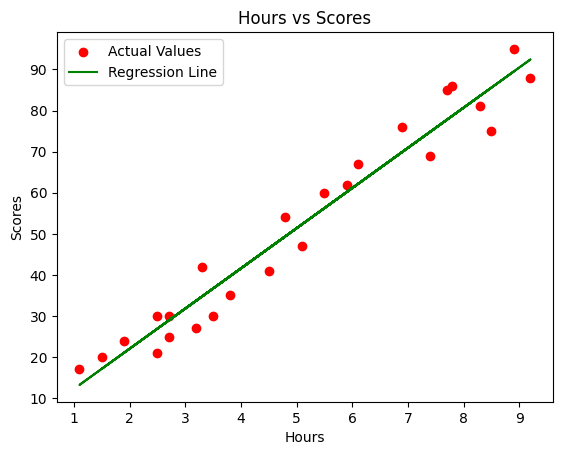

In [ ]:
# evaluate using visualizations

# plot actual values
plt.scatter(M,N,color='red',label='Actual Values')
# plot regression line -- dependent values
plt.plot(M,pred_values,color='green',label='Regression Line')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# always generate this graph for simple linear

In [ ]:
# R-squared
# after fitting the line we want to know how well the line explains the data - that's where R2 comes in
# R - regression score function
# how well the line explains the data

from sklearn.metrics import r2_score
regg_scr = r2_score(N,pred_values)
print('Regression Score Function:',regg_scr)
# shows how good fit model / the graph
print(f'Regression Score Function: {int(regg_scr*100)}%')

Regression Score Function: 0.9529481969048356
Regression Score Function: 95%


In [ ]:
# Stage 6 : Final Predictions
# take how many of users

hours = float(input('How Many Hours You Studied In A Day :'))
scores = lin_reg.predict([[hours]])
# use predict() methods
print(f'You can score {scores} Marks')

# remind why got same error : --
# needs to reshape - requires independent in 2D

How Many Hours You Studied In A Day :6.5
You can score [66.02639545] Marks


In [ ]:
# remove array representations
print(f'You can score {int(scores[0])} Marks')

You can score 66 Marks


In [ ]:
# use loops to return approriate hours

hours = float(input('How Many Hours You Studied In A Day :'))

if hours>=1 and hours<=10:
  scores = lin_reg.predict([[hours]])
  print(f'You can score {int(scores[0])} Marks')
else:
  print('Please Enter The Hours Between 1 till 10')
# why got more marks -- the model learned this pattern (more study, higher score)

# how to overcome

How Many Hours You Studied In A Day :6.5
You can score 66 Marks
